## CRISP-DM Methodology

1. Business Understanding
2. Data Understanding
    - 2.1 Data Plotting
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

### 1. Business Understanding

### Questions :
    - Where the data comes from?
    - What are the specifications of the data?
    
    
    - The data set comes from teaching assistant evaluation of the Statistic Department, University of Wisconsin-Madison. 
    - The data set is composed of 151 rows of data examples or examples or instances. Each instance corresponds to a teachinf assistant evaluation from a course

## 2. Data Understanding 

**Description of the data:**

In this dataset, there are 6 attributes including the class attributeindicating the class/category information

The 6 attributes are:
  1. Native English speaker or not (binary)
      - 1 (English)
      - 2 (Non-English)
  2. Course instructor (categorical)
      - 25 Categories
  3. Course (categorical)
      - 26 Categories
  4. Summer or Regular Semester (Binary)
      - 1 (Summer)
      - 2 (Regular)
  5. Class Size (Numerical)
      - Numbers
  6. Class Attributes
      - 1 (Low)
      - 2 (Medium)
      - 3 (High)

In [1]:
import pandas as pd
import numpy as np

df_2019 = pd.read_csv('tae.csv')

In [2]:
# describe the data
df_2019.describe()

,1,23,3,1.1,19,3.1
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.813333,13.580000,8.140000,1.853333,27.926667,2.013333
std,0.390949,6.805318,7.034937,0.354958,12.916405,0.819123
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.500000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [3]:
# get the shape/dimension of data
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       150 non-null    int64
 1   23      150 non-null    int64
 2   3       150 non-null    int64
 3   1.1     150 non-null    int64
 4   19      150 non-null    int64
 5   3.1     150 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [4]:
# adding column name to the respective columns
df.columns = ['NativeSpeaker', 'CourseInstructor', 'Course',
              'Semester', 'ClassSize', 'ClassAttribute']

df.describe()

,NativeSpeaker,CourseInstructor,Course,Semester,ClassSize,ClassAttribute
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.813333,13.580000,8.140000,1.853333,27.926667,2.013333
std,0.390949,6.805318,7.034937,0.354958,12.916405,0.819123
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.500000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [5]:
# Count observations based on attribute
df['Course'].value_counts()

3     44
2     16
1     14
15    10
17    10
11     9
7      7
5      5
8      4
9      3
25     3
13     3
16     3
21     3
22     3
18     2
6      2
14     1
12     1
10     1
19     1
20     1
4      1
23     1
24     1
26     1
Name: Course, dtype: int64

*check Null values from data*

In [6]:
# select rows from dataframe
x = df.iloc[:,:-1]

In [7]:
# sum of null data based on attributes
x.isnull().sum()

NativeSpeaker       0
CourseInstructor    0
Course              0
Semester            0
ClassSize           0
dtype: int64

### 2.1 Data Plotting

In [8]:
# library for plotting
import matplotlib.pyplot as plt

# line required for inline charts/plots
%matplotlib inline

# library for evaluation metrics
from sklearn import metrics

# library for sampling the dataset
from sklearn.model_selection import train_test_split

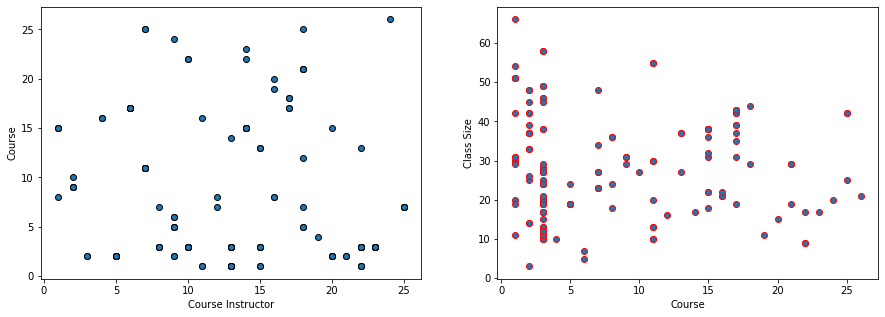

In [9]:
# size the figure to fit 2 figures on the same line
plt.figure(2, figsize=(15,5))

# subplot 1
plt.subplot(1, 2, 1)
# scatter plot 1
plt.scatter(x=x.iloc[:,1], y=x.iloc[:,2], edgecolor='k')
plt.xlabel('Course Instructor')
plt.ylabel('Course')

# subplot 2
plt.subplot(1, 2, 2)
# scatterplot 2
plt.scatter(x=x.iloc[:,2], y=x.iloc[:,4], edgecolor='r')
plt.xlabel('Course')
plt.ylabel('Class Size')

# show the resulting plot
plt.show()

### extras : reproduce above visualization in ggplot!

In [47]:
# import ggplot and required aes
from plotnine import ggplot, aes, scale_color_manual, geom_point

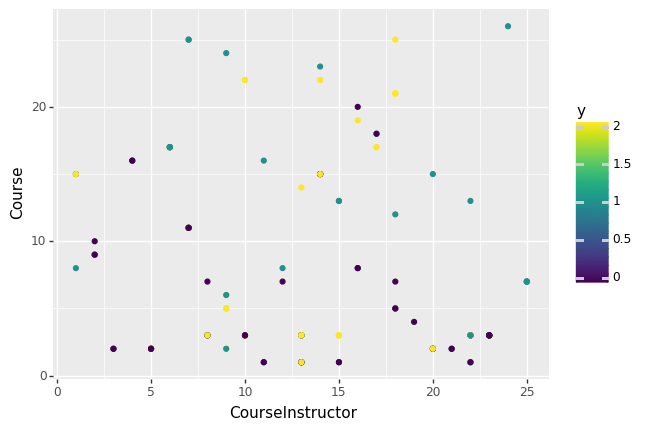

<ggplot: (-9223371911840211880)>

In [58]:
# PLot CourseInstructor vs Course
(
    ggplot(df, aes(x="CourseInstructor", y="Course", colour="y")) +
    geom_point() 
)

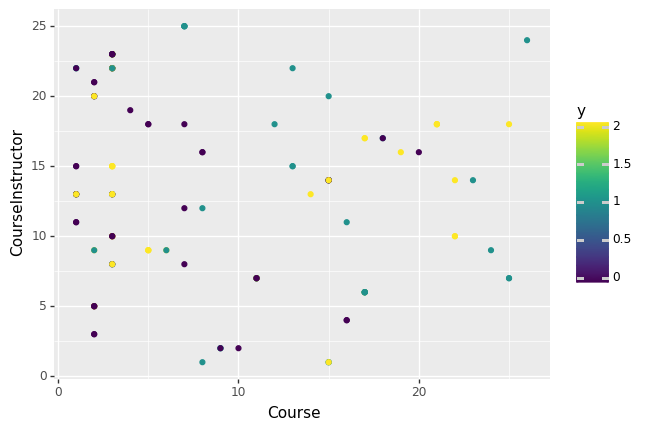

<ggplot: (-9223371911840524108)>

In [56]:
# PLot Course vs Course Instructor
(
    ggplot(df, aes(x="Course", y="CourseInstructor", colour="y")) +
    geom_point()
)

### 3. Data Preparation

The target label `Class` is categorical (attribute = 1, 2, and 3), then `label encoder` is required

In [54]:
# import label encoder library to deal with categorical data
from sklearn.preprocessing import LabelEncoder

# select all columns except the last one (the target label)
x = df.iloc[:,:-1]

# set target categorical data label (sixth attribute)
y = df.iloc[:,5]

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
print(x)
print(y)

     NativeSpeaker  CourseInstructor  Course  Semester  ClassSize
0                2                15       3         1         17
1                1                23       3         2         49
2                1                 5       2         2         33
3                2                 7      11         2         55
4                2                23       3         1         20
..             ...               ...     ...       ...        ...
145              2                 3       2         2         26
146              2                10       3         2         12
147              1                18       7         2         48
148              2                22       1         2         51
149              2                 2      10         2         27

[150 rows x 5 columns]
[2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [55]:
type(y)

numpy.ndarray

In [59]:
# import machine learning library to sample the data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

In [60]:
# import machine learning library to standardize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit_transform(x_train, y_train)
sc.fit(x_test, y_test)

StandardScaler(copy=True, with_mean=True, with_std=True)